In [1]:
import numpy as np
import pandas as pd 

import os
print(os.listdir("../input"))


[]


In [2]:
from bq_helper import BigQueryHelper
import bq_helper

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
init_notebook_mode(connected=True)

medicare = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="cms_medicare")
bq_assistant = BigQueryHelper("bigquery-public-data", "cms_medicare")

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


In [3]:
#Cleaning data
query1 = """select * from `bigquery-public-data.cms_medicare.home_health_agencies_2014` """ 
HHA = medicare.query_to_pandas_safe(query1)
print(len(HHA))
HHA = HHA.fillna(0)
HHA = HHA.drop_duplicates()

query1 = """SELECT *
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`;"""
NF = medicare.query_to_pandas_safe(query1)
NF = NF.fillna(0)
NF = NF.drop_duplicates()

10882


In [4]:
NF

,provider_id,facility_name,street_address,city,state,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,total_snf_charge_amount,total_snf_medicare_allowed_amount,total_snf_medicare_payment_amount,total_snf_medicare_standard_payment_amount,average_age,male_beneficiaries,female_beneficiaries,nondual_beneficiaries,dual_beneficiaries,white_beneficiaries,black_beneficiaries,asian_pacific_islander_beneficiaries,hispanic_beneficiaries,american_indian_or_alaska_native_beneficiaries,other_unknown_beneficiaries,average_hcc_score,percent_of_beneficiaries_with_atrial_fibrillation,percent_of_beneficiaries_with_alzheimers,percent_of_beneficiaries_with_asthma,percent_of_beneficiaries_with_cancer,percent_of_beneficiaries_with_chf,percent_of_beneficiaries_with_chronic_kidney_disease,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,55809,ST ANTHONY CARE CENTER INC,553 SMALLEY AVE.,HAYWARD,CA,94541,11,11,29.7,172198,191327,166551,105166,77,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.69,9.0,0.0,0,0,9.0,55.0,27.0,55.0,27.0,55.0,0.0,27.0,27.0,45.0,9.0,9
1,55856,HIGH VALLEY LODGE,7912 TOPLEY LANE,SUNLAND,CA,91040,13,11,38.5,286138,306249,249857,211471,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.29,27.0,73.0,0,9,55.0,36.0,27.0,64.0,36.0,55.0,0.0,73.0,18.0,73.0,0.0,18
2,65378,COTTONWOOD CARE CENTER,2311 EAST BRIDGE STREET,BRIGHTON,CO,80601,16,11,15.9,109296,91257,71497,69947,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.38,9.0,73.0,27,9,36.0,36.0,55.0,0.0,18.0,55.0,0.0,45.0,18.0,18.0,45.0,0
3,75430,MARSHALL LANE MANOR,101 MARSHALL LANE,DERBY,CT,6418,13,11,6.6,21978,27946,27946,24398,84,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.76,18.0,0.0,18,9,45.0,45.0,36.0,0.0,36.0,45.0,0.0,45.0,27.0,45.0,36.0,27
4,75432,MATTATUCK HEALTH CARE FAC,9 CLIFF ST,WATERBURY,CT,6710,15,11,26.0,73160,164404,130508,109536,79,0.0,0.0,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,2.50,36.0,0.0,9,9,45.0,73.0,55.0,0.0,55.0,45.0,0.0,55.0,9.0,55.0,55.0,0
5,110194,DONALSONVILLE HOSPITAL INC,102 HOSPITAL CIR,DONALSONVILLE,GA,39845,11,11,13.8,258971,42098,40730,49111,81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.77,0.0,55.0,0,36,36.0,45.0,45.0,27.0,45.0,64.0,0.0,55.0,27.0,64.0,9.0,27
6,115357,OCONEE HEALTH AND REHABILITATION,107 RIDGEVIEW DR,OCONEE,GA,31067,16,11,26.2,144809,137273,94561,121412,76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.31,9.0,64.0,9,18,0.0,64.0,45.0,64.0,55.0,73.0,0.0,73.0,9.0,27.0,27.0,9
7,145556,WINNING WHEELS,701 EAST 3RD STREET,PROPHETSTOWN,IL,61277,20,11,51.5,356808,418740,299572,345800,45,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.89,0.0,18.0,0,9,9.0,18.0,9.0,73.0,73.0,0.0,55.0,9.0,9.0,18.0,9.0,45
8,155459,HICKORY CREEK AT NEW CASTLE,901 N 16TH ST,NEW CASTLE,IN,47362,13,11,32.0,216152,169872,130352,146554,75,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,2.35,36.0,45.0,27,18,55.0,64.0,36.0,64.0,64.0,55.0,0.0,73.0,9.0,45.0,45.0,9
9,165355,KEOTA HEALTH CARE CENTER,204 NORTH KEOKUK WASHINGTON ROAD,KEOTA,IA,52248,16,11,12.3,102024,70707,63563,70339,80,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,2.03,36.0,55.0,0,9,45.0,45.0,18.0,27.0,18.0,45.0,0.0,27.0,9.0,73.0,18.0,27


In [5]:
NF_grouped_state = pd.merge(NF.groupby(['state'])['provider_id'].count().reset_index().rename(columns={'provider_id':'NF_count'})
, NF.groupby(['state'])['total_snf_charge_amount'].sum().reset_index().rename(columns={'total_snf_charge_amount':'total_cost'}), on='state', how='right')

In [6]:
NF_grouped_state

,state,NF_count,total_cost
0,AK,7,29655692
1,AL,239,582704468
2,AR,234,464201937
3,AZ,138,470039490
4,CA,1084,4129568330
5,CO,195,456463467
6,CT,225,819730358
7,DC,18,85834021
8,DE,38,178476757
9,FL,688,3406003907


In [7]:
HHA_grouped_state = HHA.groupby(['state'])['provider_id'].count().reset_index().rename(columns={'provider_id':'HHA_count'})

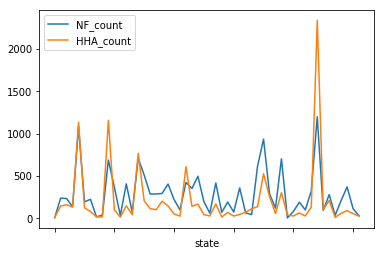

In [8]:
NF_vs_HHA = pd.merge(HHA_grouped_state, NF_grouped_state[['state','NF_count']], on='state', how='right')
NF_vs_HHA.plot(kind='line',x='state', y=['NF_count','HHA_count'])

In [9]:
col_sc = [[0.0, 'rgb(255, 130, 0)'],[0.2, 'rgb(255, 200, 0)'],[0.4, 'rgb(255, 190, 0)'], [0.6, 'rgb(255, 180, 0)'],[0.8, 'rgb(255, 153, 0)'], [1, 'rgb(234, 129, 0)']]

data = [ dict(
        type='choropleth',
        colorscale = col_sc,
        autocolorscale = False,
        locations = NF_grouped_state.state,
        z = NF_grouped_state.NF_count,
        locationmode = 'USA-states',
        text = NF_grouped_state.state,
        marker = dict(
            line = dict (
                color = 'rgb(100,100,100)',
                width = 1
            ) ),
        colorbar = dict(
            title = "Facilities in Different States")
        )
       ]

layout = dict(
        title = 'Nursing Facilities in Different States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [10]:
NF.head()

,provider_id,facility_name,street_address,city,state,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,total_snf_charge_amount,total_snf_medicare_allowed_amount,total_snf_medicare_payment_amount,total_snf_medicare_standard_payment_amount,average_age,male_beneficiaries,female_beneficiaries,nondual_beneficiaries,dual_beneficiaries,white_beneficiaries,black_beneficiaries,asian_pacific_islander_beneficiaries,hispanic_beneficiaries,american_indian_or_alaska_native_beneficiaries,other_unknown_beneficiaries,average_hcc_score,percent_of_beneficiaries_with_atrial_fibrillation,percent_of_beneficiaries_with_alzheimers,percent_of_beneficiaries_with_asthma,percent_of_beneficiaries_with_cancer,percent_of_beneficiaries_with_chf,percent_of_beneficiaries_with_chronic_kidney_disease,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,55809,ST ANTHONY CARE CENTER INC,553 SMALLEY AVE.,HAYWARD,CA,94541,11,11,29.7,172198,191327,166551,105166,77,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.69,9.0,0.0,0,0,9.0,55.0,27.0,55.0,27.0,55.0,0.0,27.0,27.0,45.0,9.0,9
1,55856,HIGH VALLEY LODGE,7912 TOPLEY LANE,SUNLAND,CA,91040,13,11,38.5,286138,306249,249857,211471,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.29,27.0,73.0,0,9,55.0,36.0,27.0,64.0,36.0,55.0,0.0,73.0,18.0,73.0,0.0,18
2,65378,COTTONWOOD CARE CENTER,2311 EAST BRIDGE STREET,BRIGHTON,CO,80601,16,11,15.9,109296,91257,71497,69947,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.38,9.0,73.0,27,9,36.0,36.0,55.0,0.0,18.0,55.0,0.0,45.0,18.0,18.0,45.0,0
3,75430,MARSHALL LANE MANOR,101 MARSHALL LANE,DERBY,CT,6418,13,11,6.6,21978,27946,27946,24398,84,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.76,18.0,0.0,18,9,45.0,45.0,36.0,0.0,36.0,45.0,0.0,45.0,27.0,45.0,36.0,27
4,75432,MATTATUCK HEALTH CARE FAC,9 CLIFF ST,WATERBURY,CT,6710,15,11,26.0,73160,164404,130508,109536,79,0.0,0.0,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,2.50,36.0,0.0,9,9,45.0,73.0,55.0,0.0,55.0,45.0,0.0,55.0,9.0,55.0,55.0,0


In [11]:
X = NF
X.index = X.provider_id
X = X.drop(['provider_id', 'facility_name', 'street_address', 'city', 'state','zip_code'], axis=1)
X = X.dropna()

# apply k-means clustering
from sklearn.cluster import KMeans 
import numpy as np 
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=500,n_init=50,random_state=2) 
X['cluster'] = kmeans.fit_predict(X)

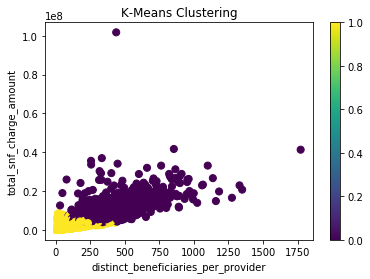

In [12]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['distinct_beneficiaries_per_provider'],X['total_snf_charge_amount'],
                     c=X['cluster'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('distinct_beneficiaries_per_provider')
ax.set_ylabel('total_snf_charge_amount')
plt.colorbar(scatter)